# Import and prepare


In [4]:
import pandas as pd
df = pd.read_csv("01_framingham_clean.csv")
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,27.0,80.0,77.0,0,0,0,1,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,29.0,95.0,76.0,0,1,0,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.0,75.0,70.0,1,0,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,29.0,65.0,103.0,0,0,1,0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.0,85.0,85.0,0,0,1,0,0


# Define what is in the final ML Algoritm

In [5]:
# train test val split
from sklearn.model_selection import train_test_split

X = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [3]:
# Apply undersampling to balance the classes in the training set
# from imblearn.under_sampling import RandomUnderSampler
# undersample = RandomUnderSampler(sampling_strategy=1)  # 1: equal balance between the classes
# X_train, y_train = undersample.fit_resample(X_train, y_train)
# y_train.value_counts()

TenYearCHD
0    521
1    521
Name: count, dtype: int64

In [6]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# showing correlations after scaling... 
# import matplotlib.pyplot as plt
# import seaborn as sns
# train = pd.concat([pd.DataFrame(X_train, columns = X.columns ), pd.DataFrame(y_train, columns=['TenYearCHD'])], axis=1, ignore_index=False)
# correlation_target = train.corr()[['TenYearCHD']].sort_values(by = 'TenYearCHD', ascending=False)
# correlation_target = correlation_target[correlation_target < 1]

# plt.figure(figsize=(8,10))
# sns.heatmap(correlation_target, annot= True, cmap= "YlGnBu", vmax = correlation_target.max(), vmin = correlation_target.min())
# plt.show()

# test for ANN 

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# # Step 2: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Step 4: Build the ANN model
# model = Sequential()
# model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
# model.add(Dense(16, activation='relu'))                              # Hidden layer
# model.add(Dense(1, activation='sigmoid'))                            # Output layer (binary classification)

# # Step 5: Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Step 6: Train the model
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# # Step 7: Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy:.2f}")

# # Optional: Plot training history
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


In [ ]:
# # Performance of the Dataset
# import numpy as np
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve, auc
# import matplotlib.pyplot as plt

# # Step 1: Get predictions
# y_pred_proba_test = model.predict(X_test)  # This returns probabilities
# y_pred_test = (y_pred_proba_test > 0.5).astype(int)  # Convert probabilities to binary predictions

# # Step 2: Calculate performance metrics
# acc_test = accuracy_score(y_test, y_pred_test)
# prec_test = precision_score(y_test, y_pred_test)
# rec_test = recall_score(y_test, y_pred_test)
# f1_test = f1_score(y_test, y_pred_test)
# roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

# # Print metrics
# print(f"Accuracy: {acc_test:.2f}")
# print(f"Precision: {prec_test:.2f}")
# print(f"Recall: {rec_test:.2f}")
# print(f"F1 Score: {f1_test:.2f}")
# print(f"ROC AUC: {roc_auc_test:.2f}")

# # Step 3: Plot confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred_test)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Step 4: ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# # Step 5: Precision-Recall Curve
# precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_test)
# pr_auc = auc(recall, precision)
# plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.show()


# Machine learning
## tying Linera regression

In [7]:
y_train.value_counts()
div = y_train.value_counts()[0]/y_train.value_counts()[1]
print(div)

5.5105566218809985


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,  class_weight={0: 1, 1: div} )

In [9]:
history = model.fit(X_train, y_train)

In [10]:
import numpy as np
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)[:, 1]
# np.unique(y_pred_proba_test)

## SVC

In [ ]:
# from sklearn.svm import SVC   
# # Benchmarket in SVC
# model = SVC(C= 0.1, kernel= 'rbf', degree= 3, gamma= 0.1, coef0= 0.0, class_weight= None, shrinking= True, tol= 0.01, max_iter= 1000, probability= True, random_state= 42)

# check the metrics

Accuracy: 0.67
Precision: 0.25
Recall: 0.63
F1 Score: 0.35
ROC AUC: 0.71
AUC: 0.71


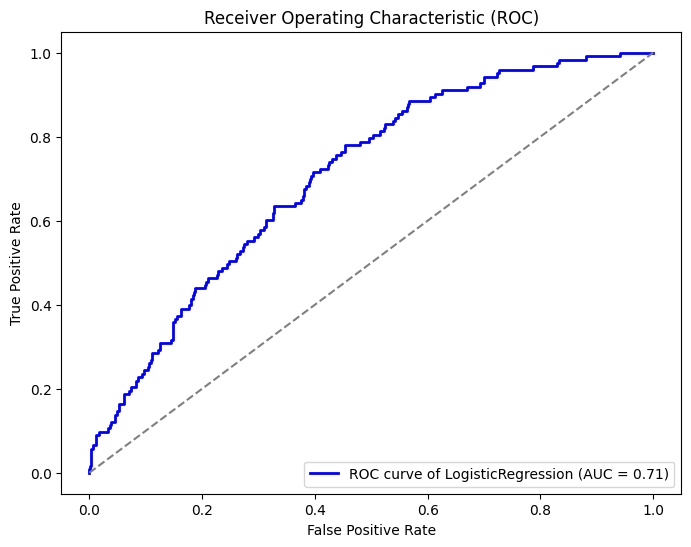

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate performance metrics for the test set
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)


# Print metrics
print(f"Accuracy: {acc_test:.2f}")
print(f"Precision: {prec_test:.2f}")
print(f"Recall: {rec_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")
print(f"ROC AUC: {roc_auc_test:.2f}")

# Get probabilities or decision scores
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve of {type(model).__name__} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [12]:
# https://www.geeksforgeeks.org/understanding-feature-importance-in-logistic-regression-models/
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

print("\nFeature Importance (Coefficient and Odds Ratio):")
feature_importance.sort_values(by='Coefficient', ascending=False).head(20)


Feature Importance (Coefficient and Odds Ratio):


,Feature,Coefficient,Odds Ratio
1,age,0.586429,1.797557
3,cigsPerDay,0.307018,1.359366
9,sysBP,0.228258,1.256409
0,male,0.156635,1.169569
6,prevalentHyp,0.122099,1.129866
13,glucose,0.113686,1.120401
5,prevalentStroke,0.083687,1.087288
7,diabetes,0.071223,1.073820
8,totChol,0.070958,1.073536
4,BPMeds,0.054697,1.056221


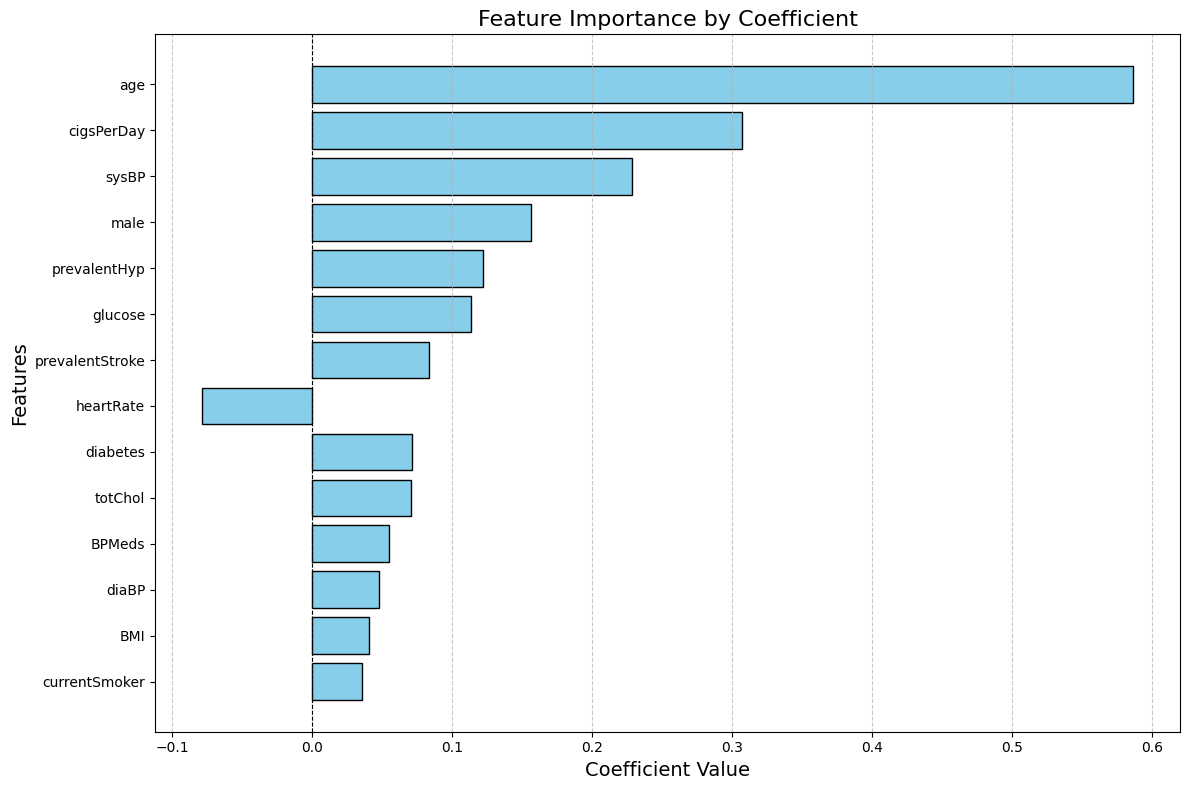

In [13]:
# Create a DataFrame
df_feature_importance = feature_importance

# Sort features by absolute coefficient values
df_feature_importance["Abs Coefficient"] = df_feature_importance["Coefficient"].abs()
df_feature_importance = df_feature_importance.sort_values(by="Abs Coefficient", ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 8))
plt.barh(df_feature_importance["Feature"], df_feature_importance["Coefficient"], color='skyblue', edgecolor='black')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
plt.title("Feature Importance by Coefficient", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

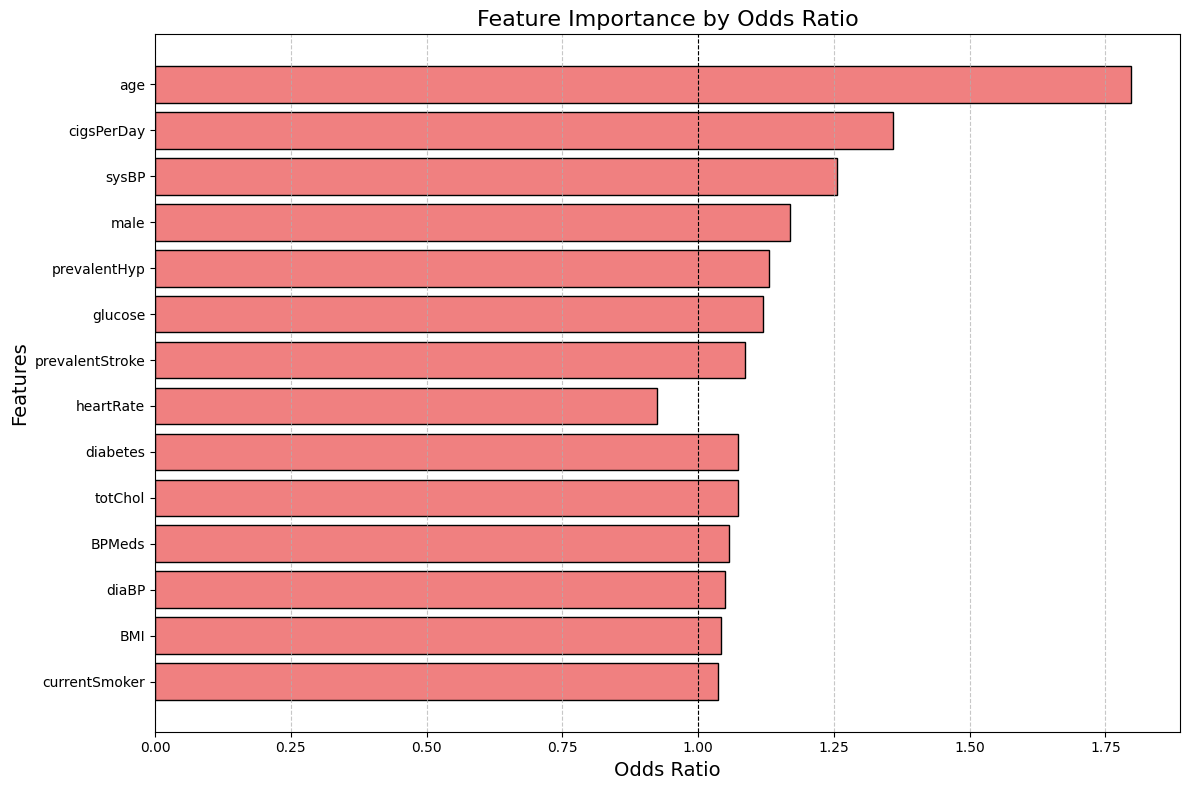

In [14]:
# Plotting feature importance using Odds Ratios
plt.figure(figsize=(12, 8))
plt.barh(df_feature_importance["Feature"], df_feature_importance["Odds Ratio"], color='lightcoral', edgecolor='black')
plt.axvline(1, color='black', linewidth=0.8, linestyle='--')  # Reference line at Odds Ratio = 1
plt.title("Feature Importance by Odds Ratio", fontsize=16)
plt.xlabel("Odds Ratio", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
# https://www.geeksforgeeks.org/understanding-feature-importance-in-logistic-regression-models/
from sklearn.inspection import permutation_importance
# Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
print("\nPermutation Importance:")
perm_importance_df.sort_values(by='Importance Mean', ascending=False).head(20)


Permutation Importance:


,Feature,Importance Mean,Importance Std
1,age,0.017138,0.010608
2,currentSmoker,0.004717,0.002217
13,glucose,0.003813,0.004869
5,prevalentStroke,0.002358,0.001668
7,diabetes,0.001965,0.001562
10,diaBP,0.001022,0.003738
4,BPMeds,0.000943,0.001072
0,male,0.000668,0.004850
11,BMI,-0.000236,0.003257
3,cigsPerDay,-0.001336,0.006807


In [16]:
# https://www.geeksforgeeks.org/understanding-feature-importance-in-logistic-regression-models/
from sklearn.feature_selection import RFE
# Recursive Feature Elimination (RFE)
rfe_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Selected Features by RFE:
Index(['male', 'age', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'heartRate', 'glucose'],
      dtype='object')


# Save the Models Scaling and SVC


In [16]:
import joblib
# Save the model and scaler
joblib.dump(model, 'model.pkl')  # Save the trained SVC model
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler object

['scaler.pkl']

In [17]:
# Assume X is a pandas DataFrame
headers = X.columns.tolist()

# Save headers to a plain text file
with open('headers.txt', 'w') as f:
    for header in headers:
        f.write(header + '\n')  # Write each header on a new line
        print(header)


male
age
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
